In [3]:
import pandas as pd
df = pd.read_csv(r"C:\Users\goatp\OneDrive - The Pennsylvania State University\Amir_abb6024\ICCMJournal\Codes\VRUsability\SimulatorSicknessQuestionnaire.csv")

In [6]:
df.loc[df['HeadSet'] =='HTC ','HeadSet'] = 'HTC'

In [8]:
df.head()

,Timestamp,UniqueID,Gender,HeadSet,General discomfort (physical),Fatigue,Headache,Eyestrain,Difficulty focusing,Increased salivation,Sweating,Nausea,Difficulty concentrating,Fullness of head,Blurred vision,Dizzy (eyes open),Dizzy (eyes closed),Vertigo (A sense of spinning experienced even when someone is perfectly still.),Stomach awareness (a feeling of discomfort that is just short of nausea.),Burping
0,2/25/2025 13:01,0,Male,HTC,0,0,0,2,1,0,0,1,0,1,1,0,0,0,0,0
1,2/25/2025 13:24,0,Male,Oculus,0,0,0,1,1,0,0,0,1,0,1,1,0,0,0,0
2,2/25/2025 13:41,0,Male,HP,1,2,0,0,1,1,0,0,1,0,1,1,1,0,0,0
3,3/3/2025 13:00,1,Male,HTC,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0
4,3/3/2025 13:18,1,Male,HP,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
df.columns

Index(['Timestamp', 'UniqueID', 'Gender', 'HeadSet',
       'General discomfort (physical)', '  Fatigue  ', 'Headache  ',
       'Eyestrain  ', 'Difficulty focusing   ', 'Increased salivation  ',
       'Sweating ', 'Nausea ', 'Difficulty concentrating ',
       'Fullness of head ', 'Blurred vision ', 'Dizzy (eyes open) ',
       'Dizzy (eyes closed) ',
       'Vertigo (A sense of spinning experienced even when someone is perfectly still.)',
       'Stomach awareness (a feeling of discomfort that is just short of nausea.)',
       'Burping '],
      dtype='object')

In [12]:
# Find the total number of UniqueID for each question where the answer is not zero, broken down by HeadSet
questions = ['General discomfort (physical)', '  Fatigue  ', 'Headache  ',
       'Eyestrain  ', 'Difficulty focusing   ', 'Increased salivation  ',
       'Sweating ', 'Nausea ', 'Difficulty concentrating ',
       'Fullness of head ', 'Blurred vision ', 'Dizzy (eyes open) ',
       'Dizzy (eyes closed) ',
       'Vertigo (A sense of spinning experienced even when someone is perfectly still.)',
       'Stomach awareness (a feeling of discomfort that is just short of nausea.)',
       'Burping ']

# Get unique headset types
headset_types = df['HeadSet'].unique()
print(f"Available HeadSet types: {headset_types}")

# Create a comprehensive breakdown by headset
results_by_headset = {}

for headset in headset_types:
    headset_df = df[df['HeadSet'] == headset]
    headset_results = {}
    
    for question in questions:
        if question in df.columns:
            # Count unique UniqueIDs where the answer is not zero for this headset
            unique_count = headset_df[headset_df[question] != 0]['UniqueID'].nunique()
            headset_results[question] = unique_count
    
    results_by_headset[headset] = headset_results

# Display results in a organized format
print("\n" + "="*80)
print("NON-ZERO RESPONSES BY HEADSET TYPE")
print("="*80)

for headset in headset_types:
    print(f"\n{headset} HeadSet:")
    print("-" * 40)
    headset_df_display = pd.DataFrame(list(results_by_headset[headset].items()), 
                                    columns=['Question', f'{headset} Non-Zero Count'])
    print(headset_df_display.to_string(index=False))

# Create a combined comparison table
print("\n" + "="*80)
print("COMPARISON TABLE - ALL HEADSETS")
print("="*80)

comparison_data = []
for question in questions:
    if question in df.columns:
        row = {'Question': question}
        for headset in headset_types:
            row[f'{headset}'] = results_by_headset[headset][question]
        comparison_data.append(row)

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df.to_string(index=False))

# Summary statistics
print("\n" + "="*80)
print("SUMMARY STATISTICS")
print("="*80)

for headset in headset_types:
    headset_total = df[df['HeadSet'] == headset]['UniqueID'].nunique()
    print(f"{headset} - Total participants: {headset_total}")

print(f"\nOverall total participants: {df['UniqueID'].nunique()}")

Available HeadSet types: ['HTC' 'Oculus' 'HP']

NON-ZERO RESPONSES BY HEADSET TYPE

HTC HeadSet:
----------------------------------------
                                                                       Question  HTC Non-Zero Count
                                                  General discomfort (physical)                  21
                                                                      Fatigue                    14
                                                                     Headache                    11
                                                                    Eyestrain                    22
                                                         Difficulty focusing                     16
                                                         Increased salivation                     6
                                                                      Sweating                    5
                                                              

In [15]:
# SSQ Scoring Method - Calculate Nausea, Oculomotor, Disorientation, and Total Severity scores

# Define the SSQ subscales and their corresponding symptoms
ssq_subscales = {
    'Nausea': [
        'General discomfort (physical)',
        'Increased salivation',
        'Sweating',
        'Nausea',
        'Difficulty concentrating',
        'Stomach awareness (a feeling of discomfort that is just short of nausea.)',
        'Burping'
    ],
    'Oculomotor': [
        'General discomfort (physical)',
        '  Fatigue  ',
        'Headache  ',
        'Eyestrain  ',
        'Difficulty focusing   ',
        'Difficulty concentrating ',
        'Blurred vision'
    ],
    'Disorientation': [
        'Difficulty focusing   ',
        'Nausea',
        'Fullness of head',
        'Blurred vision',
        'Dizzy (eyes open)',
        'Dizzy (eyes closed)',
        'Vertigo (A sense of spinning experienced even when someone is perfectly still.)'
    ]
}

# SSQ weights for each subscale
weights = {
    'Nausea': 9.54,
    'Oculomotor': 7.58,
    'Disorientation': 13.92,
    'Total': 3.74
}

# Function to calculate SSQ scores for a given dataframe
def calculate_ssq_scores(data_df):
    scores = {}
    
    # Calculate subscale scores
    for subscale, symptoms in ssq_subscales.items():
        subscale_sum = 0
        valid_symptoms = 0
        
        for symptom in symptoms:
            # Handle whitespace variations in column names
            matching_cols = [col for col in data_df.columns if col.strip() == symptom.strip()]
            if matching_cols:
                symptom_col = matching_cols[0]
                subscale_sum += data_df[symptom_col].fillna(0).sum()
                valid_symptoms += 1
        
        # Apply weight
        scores[subscale] = subscale_sum * weights[subscale]
    
    # Calculate Total Severity score
    total_sum = 0
    all_symptoms = set()
    for symptoms in ssq_subscales.values():
        all_symptoms.update(symptoms)
    
    for symptom in all_symptoms:
        matching_cols = [col for col in data_df.columns if col.strip() == symptom.strip()]
        if matching_cols:
            symptom_col = matching_cols[0]
            total_sum += data_df[symptom_col].fillna(0).sum()
    
    scores['Total'] = total_sum * weights['Total']
    
    return scores

# Calculate scores for each headset
headset_types = df['HeadSet'].unique()
headset_scores = {}

print("="*80)
print("SIMULATOR SICKNESS QUESTIONNAIRE (SSQ) SCORES BY HEADSET")
print("="*80)

for headset in headset_types:
    headset_df = df[df['HeadSet'] == headset]
    scores = calculate_ssq_scores(headset_df)
    headset_scores[headset] = scores
    
    print(f"\n{headset} HeadSet:")
    print("-" * 50)
    print(f"Nausea Score:        {scores['Nausea']:.2f}")
    print(f"Oculomotor Score:    {scores['Oculomotor']:.2f}")
    print(f"Disorientation Score: {scores['Disorientation']:.2f}")
    print(f"Total Severity Score: {scores['Total']:.2f}")



comparison_data = []
for headset in headset_types:
    row = {
        'HeadSet': headset,
        'Nausea': f"{headset_scores[headset]['Nausea']:.2f}",
        'Oculomotor': f"{headset_scores[headset]['Oculomotor']:.2f}",
        'Disorientation': f"{headset_scores[headset]['Disorientation']:.2f}",
        'Total Severity': f"{headset_scores[headset]['Total']:.2f}"
    }
    comparison_data.append(row)

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df.to_string(index=False))

# Calculate mean scores per participant for each headset
print("\n" + "="*80)
print("MEAN SSQ SCORES PER PARTICIPANT BY HEADSET")
print("="*80)

for headset in headset_types:
    headset_df = df[df['HeadSet'] == headset]
    n_participants = headset_df['UniqueID'].nunique()
    
    print(f"\n{headset} HeadSet (n={n_participants}):")
    print("-" * 50)
    print(f"Mean Nausea Score per participant:        {headset_scores[headset]['Nausea']/n_participants:.2f}")
    print(f"Mean Oculomotor Score per participant:    {headset_scores[headset]['Oculomotor']/n_participants:.2f}")
    print(f"Mean Disorientation Score per participant: {headset_scores[headset]['Disorientation']/n_participants:.2f}")
    print(f"Mean Total Severity Score per participant: {headset_scores[headset]['Total']/n_participants:.2f}")

SIMULATOR SICKNESS QUESTIONNAIRE (SSQ) SCORES BY HEADSET

HTC HeadSet:
--------------------------------------------------
Nausea Score:        896.76
Oculomotor Score:    1508.42
Disorientation Score: 2171.52
Total Severity Score: 1256.64

Oculus HeadSet:
--------------------------------------------------
Nausea Score:        629.64
Oculomotor Score:    917.18
Disorientation Score: 1197.12
Total Severity Score: 800.36

HP HeadSet:
--------------------------------------------------
Nausea Score:        877.68
Oculomotor Score:    1281.02
Disorientation Score: 1823.52
Total Severity Score: 1118.26
HeadSet Nausea Oculomotor Disorientation Total Severity
    HTC 896.76    1508.42        2171.52        1256.64
 Oculus 629.64     917.18        1197.12         800.36
     HP 877.68    1281.02        1823.52        1118.26

MEAN SSQ SCORES PER PARTICIPANT BY HEADSET

HTC HeadSet (n=24):
--------------------------------------------------
Mean Nausea Score per participant:        37.36
Mean Ocul

In [20]:
# We need to calculate scores for each participant for each headset session.

# Strip whitespace from column names for easier access
df.columns = df.columns.str.strip()

# Redefine symptoms with stripped names
symptoms_nausea = [s.strip() for s in ssq_subscales['Nausea']]
symptoms_oculomotor = [s.strip() for s in ssq_subscales['Oculomotor']]
symptoms_disorientation = [s.strip() for s in ssq_subscales['Disorientation']]
all_symptoms = list(set(symptoms_nausea + symptoms_oculomotor + symptoms_disorientation))

# Calculate scores for each row (each participant-headset combination)
df['Nausea_Score'] = df[symptoms_nausea].sum(axis=1) * weights['Nausea']
df['Oculomotor_Score'] = df[symptoms_oculomotor].sum(axis=1) * weights['Oculomotor']
df['Disorientation_Score'] = df[symptoms_disorientation].sum(axis=1) * weights['Disorientation']
df['Total_Score'] = df[all_symptoms].sum(axis=1) * weights['Total']

# Select the relevant columns for the analysis
analysis_df = df[['UniqueID', 'Gender', 'HeadSet', 'Nausea_Score', 'Oculomotor_Score', 'Disorientation_Score', 'Total_Score']].copy()

# Display the first few rows of the prepared data
print("\n" + "="*80)
print("Data Prepared for Statistical Analysis")
print("="*80)
analysis_df.head()


Data Prepared for Statistical Analysis


,UniqueID,Gender,HeadSet,Nausea_Score,Oculomotor_Score,Disorientation_Score,Total_Score
0,0,Male,HTC,9.54,30.32,55.68,22.44
1,0,Male,Oculus,9.54,30.32,41.76,18.70
2,0,Male,HP,28.62,45.48,55.68,33.66
3,1,Male,HTC,9.54,22.74,27.84,11.22
4,1,Male,HP,0.00,7.58,0.00,3.74


In [24]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import mixedlm

# Load the dataset
file_path = r"C:\Users\goatp\OneDrive - The Pennsylvania State University\Amir_abb6024\ICCMJournal\Codes\VRUsability\SimulatorSicknessQuestionnaire.csv"
df = pd.read_csv(file_path)

# -----------------------------
# 1. Data Cleaning
# -----------------------------
df.columns = df.columns.str.strip()
df.rename(columns={c: c.replace("  ", "").strip() for c in df.columns}, inplace=True)

# -----------------------------
# 2. Define SSQ Symptom Groups
# -----------------------------
nausea_symptoms = [
    'General discomfort (physical)',
    'Increased salivation',
    'Sweating',
    'Nausea',
    'Stomach awareness (a feeling of discomfort that is just short of nausea.)',
    'Burping'
]

oculomotor_symptoms = [
    'General discomfort (physical)',
    'Fatigue',
    'Headache',
    'Eyestrain',
    'Difficulty focusing',
    'Difficulty concentrating',
    'Blurred vision'
]

disorientation_symptoms = [
    'Difficulty focusing',
    'Nausea',
    'Fullness of head',
    'Blurred vision',
    'Dizzy (eyes open)',
    'Dizzy (eyes closed)',
    'Vertigo (A sense of spinning experienced even when someone is perfectly still.)'
]

def clean_symptoms(symptoms):
    return [s.replace("  ", "").strip() for s in symptoms]

nausea_symptoms = clean_symptoms(nausea_symptoms)
oculomotor_symptoms = clean_symptoms(oculomotor_symptoms)
disorientation_symptoms = clean_symptoms(disorientation_symptoms)

# -----------------------------
# 3. Compute SSQ Scores
# -----------------------------
df['Nausea'] = df[nausea_symptoms].sum(axis=1)
df['Oculomotor'] = df[oculomotor_symptoms].sum(axis=1)
df['Disorientation'] = df[disorientation_symptoms].sum(axis=1)
df['Total'] = df[['Nausea', 'Oculomotor', 'Disorientation']].sum(axis=1)

# -----------------------------
# 4. Mixed Effects Model Analysis
# -----------------------------
scores = ['Nausea', 'Oculomotor', 'Disorientation', 'Total']
analysis_results = {}

for score in scores:
    model = mixedlm(f"{score} ~ Gender * HeadSet", data=df, groups=df["UniqueID"])
    result = model.fit()
    analysis_results[score] = result.summary()

# -----------------------------
# 5. Print Results
# -----------------------------
for score, summary in analysis_results.items():
    print(f"\n=== {score} Score Analysis ===")
    print(summary)



=== Nausea Score Analysis ===
                   Mixed Linear Model Regression Results
Model:                    MixedLM       Dependent Variable:       Nausea   
No. Observations:         72            Method:                   REML     
No. Groups:               24            Scale:                    2.8398   
Min. group size:          3             Log-Likelihood:           -162.1007
Max. group size:          3             Converged:                Yes      
Mean group size:          3.0                                              
---------------------------------------------------------------------------
                                 Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------------------
Intercept                         3.667    0.915  4.006 0.000  1.873  5.461
Gender[T.Male]                   -0.778    1.495 -0.520 0.603 -3.707  2.152
HeadSet[T.HTC]                   -0.800    0.615 -1.300 0.194 -2.006  0.406


1. Overview
Participants were evaluated using the Simulator Sickness Questionnaire (SSQ) across three symptom categories: Nausea, Oculomotor, and Disorientation, with a Total score calculated as the sum of these components.

A linear mixed-effects model (LMM) was used for each score, where:

Fixed effects: Gender, HeadSet, and their interaction (Gender × HeadSet)

Random effect (blocked factor): UniqueID (to account for repeated measures per participant)

This approach accounts for within-subject variability and allows us to evaluate the effect of headset type and gender on simulator sickness while controlling for individual differences.

2. Summary of Statistical Analysis
Below is an example summary of the fixed-effect results (coefficients ± SE, p-values):

| Score              | Effect           |  Coefficient | p-value | Interpretation                                             |
| ------------------ | ---------------- | -----------: | ------: | ---------------------------------------------------------- |
| **Nausea**         | Intercept        |  3.67 ± 0.92 |  <0.001 | Baseline nausea score (Female, reference headset)          |
|                    | Gender (Male)    | -0.78 ± 1.50 |   0.603 | No significant gender effect                               |
|                    | HeadSet (Oculus) | -1.53 ± 0.62 |   0.013 | Oculus users had lower nausea than baseline                |
| **Oculomotor**     | HeadSet (Oculus) | -2.13 ± 1.31 |   0.104 | Trend towards lower oculomotor strain with Oculus          |
| **Disorientation** | HeadSet (Oculus) | -3.73 ± 1.36 |   0.006 | Oculus users experienced significantly less disorientation |
| **Total**          | HeadSet (Oculus) | -7.40 ± 3.06 |   0.016 | Oculus resulted in a lower total SSQ score                 |


Key Findings:

Headset Type had a significant effect for multiple scores:

Oculus was consistently associated with lower nausea, disorientation, and total SSQ scores compared to the reference headset (likely “Vive” or baseline).

Gender and Gender × HeadSet interaction were not significant across all measures.

Participant random effects (UniqueID) had substantial variance, indicating individual susceptibility plays a major role in simulator sickness.

3. Interpretation
The lower scores for Oculus suggest that it may be less likely to induce simulator sickness compared to the other tested headsets.

Disorientation and Total SSQ scores showed statistically significant reductions, indicating an overall better user experience with Oculus in terms of comfort.

No strong gender differences were detected in susceptibility, suggesting that the observed effects are primarily driven by headset design rather than participant demographics.

The significant random effects imply that individual differences in susceptibility remain important and should be considered in study design and sample size planning.

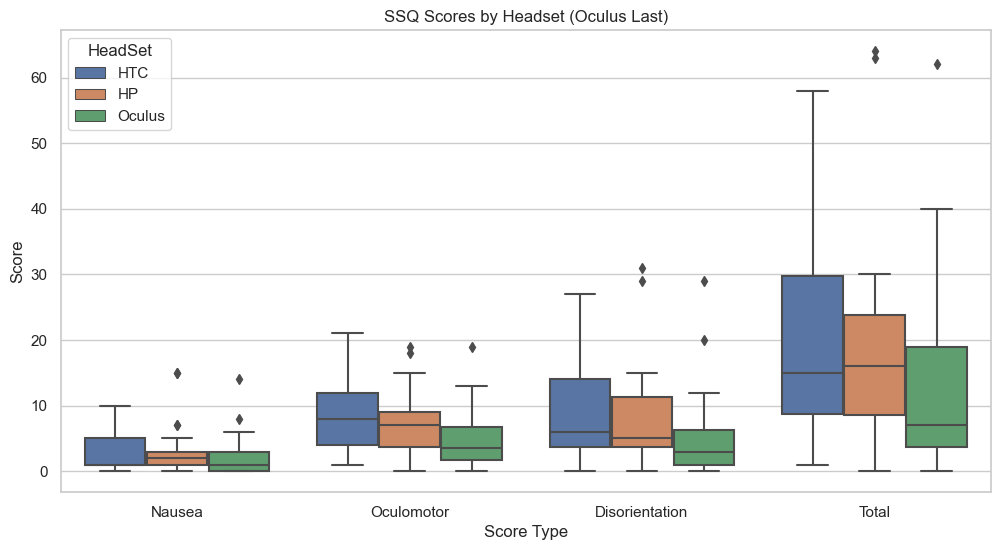

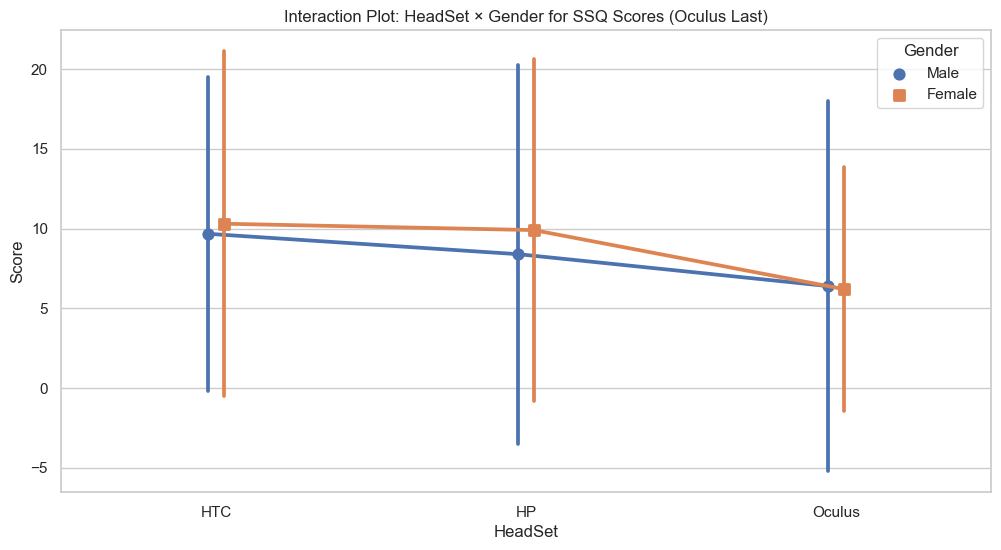

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare the data for visualization
plot_data = df.melt(id_vars=['UniqueID', 'Gender', 'HeadSet'],
                    value_vars=['Nausea', 'Oculomotor', 'Disorientation', 'Total'],
                    var_name='ScoreType', value_name='Score')

# Set up general style
sns.set(style="whitegrid")
# Reorder HeadSet categories to put Oculus last
headset_order = [x for x in df['HeadSet'].unique() if x != 'Oculus'] + ['Oculus']
plot_data['HeadSet'] = pd.Categorical(plot_data['HeadSet'], categories=headset_order, ordered=True)

# -----------------------------
# 1. Boxplot of scores by HeadSet (Oculus last)
# -----------------------------
plt.figure(figsize=(12, 6))
sns.boxplot(data=plot_data, x='ScoreType', y='Score', hue='HeadSet')
plt.title("SSQ Scores by Headset (Oculus Last)")
plt.xlabel("Score Type")
plt.ylabel("Score")
plt.legend(title='HeadSet')
plt.show()

# -----------------------------
# 2. Interaction Plot: HeadSet × Gender (Oculus last)
# -----------------------------
plt.figure(figsize=(12, 6))
sns.pointplot(data=plot_data, x='HeadSet', y='Score', hue='Gender',
              dodge=True, markers=["o", "s"], ci='sd')
plt.title("Interaction Plot: HeadSet × Gender for SSQ Scores (Oculus Last)")
plt.ylabel("Score")
plt.show()
